# **importing the required libraries**

In [1]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing
from numpy import int64
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import numpy as np
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# loading the dataset

In [2]:
df = pd.read_csv("/content/day.csv",encoding='latin1')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# **Data Cleaning**

Missing data can either be filled with the means of the features or maybe 0 to ignore them or even other data imputation techniques to predict the missing values
In this case the mean of the features is taken for the missing values.

In [3]:
# Handling the NULL values
df = df.fillna(df.mean())
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# Applying label encodings
from sklearn.preprocessing import LabelEncoder
df['dteday'] = LabelEncoder().fit_transform(df['dteday'])

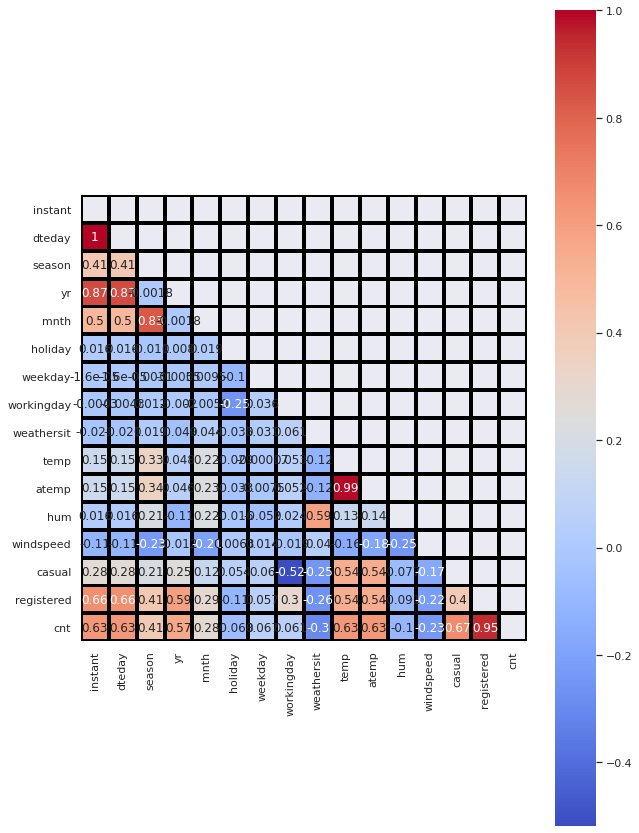

In [5]:
#plotting correlation values
matrix = np.triu(df.corr())
sns.set(rc={'figure.figsize':(10,15)})
sns.heatmap(df.corr(), annot = True,cmap= 'coolwarm' ,linewidths=3, linecolor='black', square=True , mask=matrix)

# Linear Regression

In [6]:
# Selecting the DEPENDENT and INDEPENDENT  varables.
y = df['cnt']
x = df.drop(['cnt','dteday'], axis = 1)

In [7]:
# Splitting the dataset into TRAIN and TEST data. 
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x = min_max_scaler.fit_transform(x)

#Split data into training and testing datasets 80% for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [8]:
#Linear regression using SKLearn Linear Regression method
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
#Build linear regression model
model = Lasso()
# Train the model, using training data set
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Intercept =', model.intercept_)
print('Coefficients = ', model.coef_)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(  mse)
r2score = r2_score(y_test, y_pred)
print("Mean squared error(MSE) = %.2f" %   mse)
print("Root Mean squared error(RMSE) = %.2f" % rmse)
print('R2 score = %.2f' % r2score)

Intercept = 34.394477016900964
Coefficients =  [ 0.00000000e+00  0.00000000e+00  2.25868938e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  3.38865758e+03  6.90931217e+03]
Mean squared error(MSE) = 39.60
Root Mean squared error(RMSE) = 6.29
R2 score = 1.00


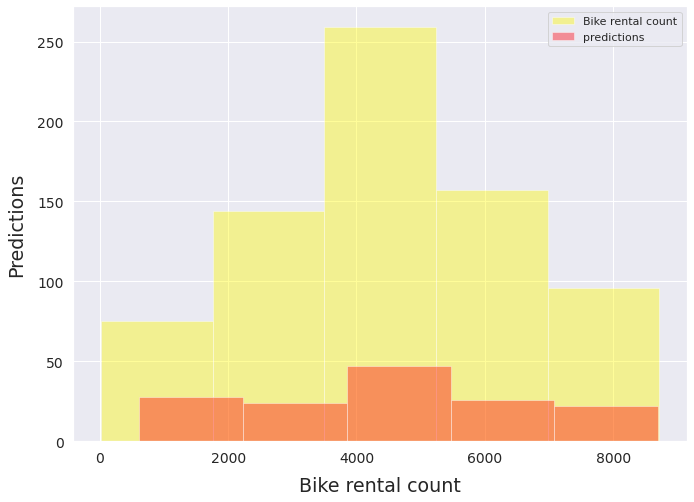

In [9]:
fig, ax = plt.subplots(figsize = (11, 8))
sns.distplot(df.cnt, kde=False,color='#FFFB00', bins=5, label='Bike rental count')
sns.distplot(y_pred, kde=False, color='#FF000C', bins=5, label='predictions')

plt.xlabel('Bike rental count', fontsize=19, labelpad=11)
plt.xticks(fontsize=14)
plt.ylabel('Predictions', fontsize=19, labelpad=11)
plt.yticks(fontsize=14)
plt.legend(loc='upper right');

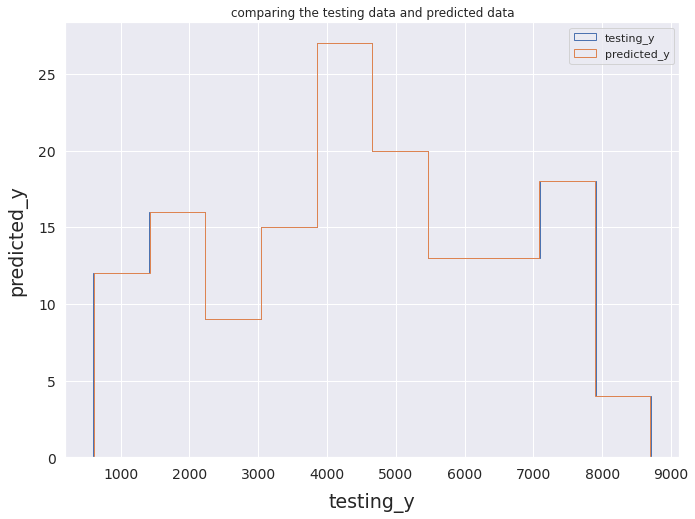

In [10]:
fig, ax = plt.subplots(figsize = (11, 8))
ax.hist(y_test,label='testing_y',histtype='step')
ax.hist(y_pred,label='predicted_y',histtype='step')
plt.title('comparing the testing data and predicted data')
plt.xlabel('testing_y', fontsize=19, labelpad=11)
plt.xticks(fontsize=14)
plt.ylabel('predicted_y', fontsize=19, labelpad=11)
plt.yticks(fontsize=14)
plt.legend(loc='upper right');
#looking at the distribution of my target variable versus my predictions

In [11]:
#predicted values and testing values are close to each other in visualization

In [12]:
#predicted values and testing values are close to each other in the **dataframe**
p = pd.DataFrame(list(zip(x_test,y_test,y_pred)),columns=['x','target_y','predicted_y'])
p.head()

,x,target_y,predicted_y
0,"[0.2684931506849315, 0.6666666666666667, 0.0, ...",5923,5913.285322
1,"[0.25616438356164384, 0.6666666666666667, 0.0,...",4592,4590.927162
2,"[0.01917808219178082, 0.0, 0.0, 0.0, 0.0, 1.0,...",1248,1256.721943
3,"[0.04246575342465753, 0.0, 0.0, 0.090909090909...",1360,1369.023660
4,"[0.5342465753424657, 0.0, 1.0, 0.0, 0.0, 0.666...",4075,4079.097269


# Outlier

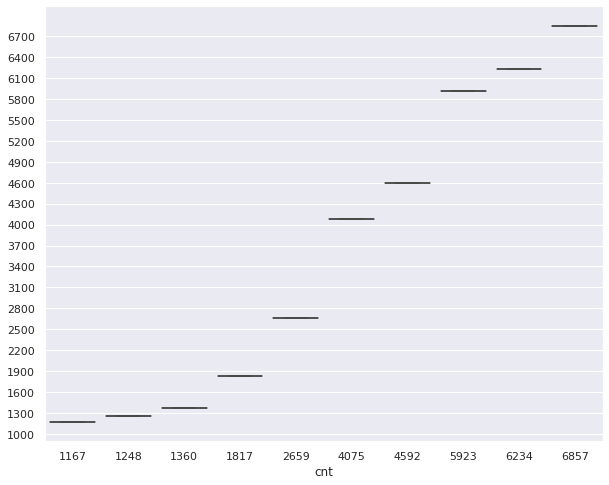

In [61]:
ax = sns.boxplot(y_test[:10],y_pred[:10])
sns.set(rc={'figure.figsize':(10,9)})
plt.yticks(np.arange(1000,7000,300))
plt.show()